# Randomized Graph Algorithms
Laryn Qi – May 23-25, 2023

In [1]:
import random

In [2]:
from collections import deque

class Stack:

    def __init__(self):
        self.dq = deque()

    def insert(self, x):
        self.dq.append(x)

    def pop(self):
        return self.dq.pop()

    def is_empty(self):
        return not self.dq
    
    def contains(self, x):
        return x in self.dq
    
    def remove(self, x):
        self.dq.remove(x)


class Queue(Stack):

    def pop(self):
        return self.dq.popleft()

In [3]:
class Vertex:
    
    idx = 0
    
    def __init__(self, name):
        self.idx = Vertex.idx
        Vertex.idx += 1
        
        self.name = name
        
    def __str__(self):
        return f'{self.name}: {self.idx}'
    
class Graph:
    def __init__(self, name):
        self.vertices = dict()
        self.edges = dict()
        self.name = name
        self.curr = None
        
    def add_vertex(self, v):
        assert v.name not in self.vertices, f'Vertex {v.name} already exists in Graph {self.name}'
        self.vertices[v.name] = v
        self.edges[v.name] = set()
        
    def connect(self, u, v):
        assert u in self.vertices, f'Vertex {u} does not exist in Graph {self.name}'
        assert v in self.vertices, f'Vertex {v} does not exist in Graph {self.name}'
        self.edges[u].add(v)
        self.edges[v].add(u)
        
    def __str__(self):
        return str(self.edges)
    
    @classmethod
    def lollipop(cls, m, n):
        g = cls('lollipop')
        # clique
        for i in range(m):
            v = Vertex(f'v{i}')
            g.add_vertex(v)
        for i in range(m):
            for j in range(i+1, m):
                g.connect(f'v{i}', f'v{j}')
        # line
        for i in range(m, m+n):
            v = Vertex(f'v{i}')
            g.add_vertex(v)
        g.connect('v0', f'v{m}') # connection point
        for i in range(m, m+n-1):
            g.connect(f'v{i}', f'v{i+1}')
        return g
    
    @classmethod
    def line(cls, n):
        g = cls('line')
        for i in range(n):
            v = Vertex(f'v{i}')
            g.add_vertex(v)
        for i in range(n - 1):
            g.connect(f'v{i}', f'v{i+1}')
        return g
    
    @classmethod
    def gamblers_line(cls, n):
        g = cls('gamblers-line')
        for i in range(n):
            v = Vertex(f'{i}')
            g.add_vertex(v)
        for i in range(n - 1):
            g.connect(f'{i}', f'{i+1}')
        return g
    
    @classmethod
    def clique(cls, k):
        g = cls('clique')
        for i in range(k):
            v = Vertex(f'v{i}')
            g.add_vertex(v)
        for i in range(k):
            for j in range(i+1, k):
                g.connect(f'v{i}', f'v{j}')
        return g
    
    def move_to(self, v):
        self.curr = v
        return self.curr
        
    def neighbors(self, v):
        return self.edges[v]
        ###
        """
        nbors = set()
        for e in self.edges:
            v1, v2 = e
            if v1 == v:
                nbors.add(v2)
            elif v2 == v:
                nbors.add(v1)
        return nbors
        """
    
    def random_step(self):
        assert self.curr is not None, f'Graph needs a starting vertex'
        return self.move_to(self.sample(self.neighbors(self.curr)))
        
    def random_walk(self, n=None):
        vertex_set = self.vertices.keys()
        path = []
        if self.curr is None:
            self.curr = self.sample(vertex_set)
            path.append(self.curr)
        if n is not None:
            while n > 0:
                path.append(self.random_step())
                n -= 1
            return path
        visited = set()
        while vertex_set - visited:
            path.append(self.random_step())
            visited.add(self.curr)
        return path
    
    def random_walk_until(self, targets):
        assert self.curr is not None, f'Starting point of a random walk with a target endpoint cannot be None'
        path = []
        first = True
        while self.curr not in targets or first:
            path.append(self.random_step())
            first = False
        return path
    
    def weighted_random_walk_until(self, p, q, targets):
        assert self.curr is not None, f'Starting point of a random walk with a target endpoint cannot be None'
        path = []
        first = True
        while self.curr not in targets or first:
            nbors = list(self.neighbors(self.curr))
            assert len(nbors) == 2, f'Graph should be a line graph and target vertices should be the endpoint vertices – currently at {self.curr} with neighbors {self.neighbors(self.curr)}'
            nbor0, nbor1 = nbors
            try:
                nbor0_val, nbor1_val = int(nbor0), int(nbor1)
                curr_val = int(self.curr)
            except ValueError:
                raise Exception('Vertices should be named as integers')
            if nbor0_val < curr_val:
                left, right = nbor0, nbor1
            else:
                left, right = nbor1, nbor0
            if random.random() < p:
                path.append(self.move_to(right))
            else:
                path.append(self.move_to(left))
            first = False
        return path
    
    def random_step(self):
        assert self.curr is not None, f'Graph needs a starting vertex'
        return self.move_to(self.sample(self.neighbors(self.curr)))
    
    @staticmethod
    def sample(s):
        return random.choice(list(s))
    
    @classmethod
    def copy(cls, g):
        new = cls(f'copy of {g.name}')
        new.vertices = g.vertices.copy()
        for u in g.edges:
            new.edges[u] = g.edges[u].copy()
#         new.edges = g.edges.copy()
        new.curr = g.curr
        return new
    
    @classmethod
    def gnp(cls, n, p):
        g = cls(f'G_\u007b{n},{p}\u007d')
        for i in range(n):
            v = Vertex(f'v{i}')
            g.add_vertex(v)
        for i in range(n):
            for j in range(i+1, n):
                if random.random() < p:
                    g.connect(f'v{i}', f'v{j}')
        return g
    
    def karger(self):
        copy = Multigraph.copy(self)
        while len(copy.vertices) > 2:
            e = Graph.sample(copy.edge_set())
            copy.contract(e)
        cut = copy.edge_set()
        u, v = tuple(copy.vertices.keys())
        s0, s1 = set(), set()
        for vertex in u.split('-'):
            s0.add(vertex)
        for vertex in v.split('-'):
            s1.add(vertex)
        return s0, s1
    
    def remove_edge(self, e):
        u, v = e
        self.edges[u].remove(v)
        self.edges[v].remove(u)
        
    def dfs(self, start=None):
        start = start or self.curr
        assert start is not None, 'DFS needs a starting vertex'
        return self.search(start, Stack())
    
    def bfs(self, start=None):
        start = start or self.curr
        assert start is not None, 'BFS needs a starting vertex'
        return self.search(start, Queue())
        
    def search(self, start, ds):
        visited = list()
        ds.insert(start)
        while not ds.is_empty():
            u = ds.pop()
            visited.append(u)

            for v in self.neighbors(u):
                if v not in visited:
                    if ds.contains(v):
                        ds.remove(v)
                    ds.insert(v)
        return visited
        
        
    def edge_set(self):
        edges = set()
        for u in self.edges:
            for v in self.edges[u]:
                if (v, u) not in edges:
                    edges.add((u, v))
        return edges
        
    def contract(self, e):
        u, v = e
        merged_neighbors = (self.neighbors(u) | self.neighbors(v)) - {u , v}
        self.remove_vertex(u)
        self.remove_vertex(v)
        s = Vertex(f'{u}-{v}')
        self.add_vertex(s)
        for t in merged_neighbors:
                self.connect(s.name, t)
            
    def remove_vertex(self, u):
        for v in self.neighbors(u):
            self.edges[v].remove(u)
        self.edges.pop(u)
        self.vertices.pop(u)
    
    def verify(self, c0, c1):
        certificate = self.count(c0, c1)
        n = len(self.vertices)
        for b in range(1, (2 ** n) - 1): # exclude empty partitions
            s0 = set()
            s1 = set()
            for i in range(n):
                if (b >> i) & 1 == 0:
                    s0.add(f'v{i}')
                else:
                    s1.add(f'v{i}')
            if self.count(s0, s1) < certificate:
                return False
        return True
    
    def count(self, s0, s1):
        assert s0 | s1 == set(self.vertices.keys()), 'Partition of vertices must assign each vertex to exactly one set'
        total = 0
        for u in s0:
            for v in self.neighbors(u):
                if v in s1:
                    total += 1
        return total
    
    def is_connected(self):
        return not bool(self.vertices.keys() - self.bfs(Graph.sample(self.vertices)))
        
    def independent_sets(self, k):
        n = len(self.vertices)
        indep_sets = list()
        subsets = Graph.subsets(list(self.vertices.keys()), k)
        for s in subsets:
            count = True
            for u in s:
                if not count:
                    break
                for v in self.edges[u]:
                    if v in s:
                        count = False
                        break
            if count:
                indep_sets.append(s)
        return indep_sets
    
    @staticmethod
    def subsets(s, k):
        if k > len(s):
            return []
        if k == 0:
            return [[]]
        curr = s[0]
        with_curr, without_curr = Graph.subsets(s[1:], k - 1), Graph.subsets(s[1:], k)
        return [[curr] + subset for subset in with_curr] + without_curr     
    
    @staticmethod
    def choose(n, k):
        return Graph.fact(n) / (Graph.fact(k) * Graph.fact(n-k))
        
    @staticmethod
    def fact(n):
        return 1 if n < 1 else n * Graph.fact(n-1)
    
    def random_partition(self, p=0.5):
        s0, s1 = set(), set()
        for v in self.vertices:
            if random.random() < p:
                s0.add(v)
            else:
                s1.add(v)
        return s0, s1
    
    def num_edges(self):
        return len(self.edge_set())
    
    def greedy_max_cut(self):
        vertices = list(self.vertices.keys())
        A, B = set(), set()
        A.add(vertices[0])
        for u in vertices[1:]:
            count_a, count_b = 0, 0
            for v in self.neighbors(u):
                if v in A:
                    count_a += 1
                if v in B:
                    count_b += 1
            if count_a > count_b:
                B.add(u)
            else:
                A.add(u)
        return A, B
    
    def random_independent_set(self):
        d = self.avg_degree()
        p = 1 - (1/d)
        copy = Graph.copy(self)
        for u in self.vertices:
            if random.random() < p:
                copy.remove_vertex(u)
        for e in copy.edge_set().copy():
            if e in copy.edge_set():
                copy.remove_vertex(random.choice(e))
        return set(copy.vertices.keys())
        
    def avg_degree(self):
        return (2 * self.num_edges()) / len(self.vertices)
    
    def verify_independent_set(self, s):
        for u in s:
            if set(self.neighbors(u)) & s != set():
                return False
        return True

In [4]:
class Multigraph(Graph):
        
    def add_vertex(self, v):
        assert v.name not in self.vertices, f'Vertex {v.name} already exists in Graph {self.name}'
        self.vertices[v.name] = v
        self.edges[v.name] = list()
        
    def connect(self, u, v):
        assert u in self.vertices, f'Vertex {u} does not exist in Graph {self.name}'
        assert v in self.vertices, f'Vertex {v} does not exist in Graph {self.name}'
        self.edges[u].append(v)
        self.edges[v].append(u)
    
    def edge_set(self):
        edges = list()
        for u in self.edges:
            for v in self.edges[u]:
                if (v, u) not in edges:
                    edges.append((u, v))
        return edges
    
    @classmethod
    def copy(cls, g):
        new = cls(f'copy of {g.name}')
        new.vertices = g.vertices.copy()
        for u in g.edges:
            new.edges[u] = list(g.edges[u].copy())
#         new.edges = g.edges.copy()
        new.curr = g.curr
        return new
    
    def contract(self, e):
        u, v = e
        merged_neighbors = self.neighbors(u) + self.neighbors(v)
        self.remove_vertex(u)
        self.remove_vertex(v)
        s = Vertex(f'{u}-{v}')
        self.add_vertex(s)
        for t in merged_neighbors:
            if t != u and t != v:
                self.connect(s.name, t)

# Average Cover Time of Random Walks on Various Graphs
### Inspired by CS 174 Sp23 HW8 Q2
- pset: https://people.eecs.berkeley.edu/~sinclair/cs174/ex8.pdf
- sol: https://people.eecs.berkeley.edu/~sinclair/cs174/sol8.pdf

In [5]:
# O(n^2)
line = Graph.line(5)
[len(line.random_walk()) for _ in range(10)]

[24, 18, 18, 12, 26, 14, 10, 32, 24, 28]

In [6]:
# O(nlogn + n)
clique = Graph.clique(5)
[len(clique.random_walk()) for _ in range(10)]

[8, 13, 14, 11, 13, 13, 22, 7, 7, 9]

In [7]:
# O(n^3)
lollipop = Graph.lollipop(3, 2)
[len(lollipop.random_walk()) for _ in range(10)]

[7, 15, 8, 16, 14, 26, 48, 8, 8, 7]

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot(start=5, stop=100, step=5, samples=1000, mode='median'):
    lines = []
    cliques = []
    lollipops = []
    for n in range(start, stop, step):
        if mode == 'mean':
            line_sum, clique_sum, lollipop_sum = 0, 0, 0
            for _ in range(samples):
                line = Graph.line(n)
                clique = Graph.clique(n)
                lollipop = Graph.lollipop(n//2, n//2)
                line_sum += len(line.random_walk())
                clique_sum += len(clique.random_walk())
                lollipop_sum += len(lollipop.random_walk())
            lines.append(line_sum / samples)
            cliques.append(clique_sum / samples)
            lollipops.append(lollipop_sum / samples)
        elif mode == 'median':
            line_vals, clique_vals, lollipop_vals = [], [], []
            for _ in range(samples):
                line = Graph.line(n)
                clique = Graph.clique(n)
                lollipop = Graph.lollipop(n//2, n//2)
                line_vals.append(len(line.random_walk()))
                clique_vals.append(len(clique.random_walk()))
                lollipop_vals.append(len(lollipop.random_walk()))
            lines.append(sorted(line_vals)[samples//2])
            cliques.append(sorted(clique_vals)[samples//2])
            lollipops.append(sorted(lollipop_vals)[samples//2])
    x = range(start, stop, step)
    plt.title('Average Cover Time of Random Walks on Graphs')
    plt.xlabel('# vertices')
    plt.ylabel('avg # of steps')
    plt.plot(x, lines, label='Line')
    plt.plot(x, cliques, label='Clique')
    plt.plot(x, lollipops, label='Lollipop')
    max_steps = max(lines + cliques + lollipops)
#     plt.ylim(0, max_steps)
#     plt.yticks(range(0, max_steps, 50))
#     plt.xticks(x)
    plt.legend()
    plt.show()

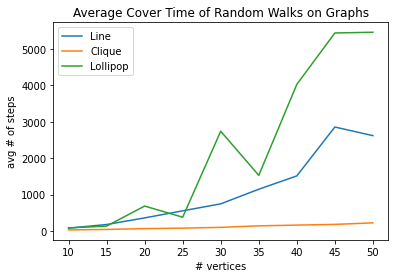

In [10]:
plot(start=10, stop=51, step=5, samples=20)

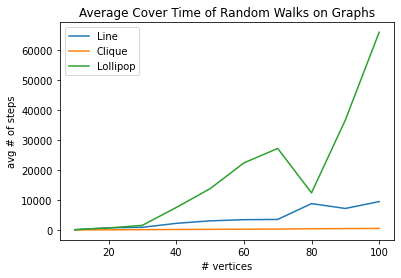

In [11]:
plot(start=10, stop=101, step=10, samples=20)

# Karger's Min Cut Algorithm
### Inspired by CS 174 Sp23 Lecture 3
- website: https://people.eecs.berkeley.edu/~sinclair/cs174/s23.html

### (MU) Theorem 1.8: Karger's Min Cut Algorithm outputs a min cut with probability at least $$\frac{2}{n(n-1)}$$

In [12]:
def karger_test(start, stop, step, samples, p):
    bounds, actuals = [], []
    for n in range(start, stop, step):
        prob_bound = 2/(n * (n - 1))
        prob_actual = 0
        for _ in range(samples):
            g = Graph.gnp(n, p)
            while not g.is_connected():
                g = Graph.gnp(n, p)
            s0, s1 = g.karger()
            if g.verify(s0, s1):
                prob_actual += 1
        prob_actual /= samples
        print(f'{n} vertices – p_bound: {round(prob_bound, 3)}, p_actual: {round(prob_actual, 3)}')
        bounds.append(prob_bound)
        actuals.append(prob_actual)
        if prob_actual < prob_bound:
            print('failed')
            return
    print('passed!')
    return bounds, actuals

In [13]:
bounds, actuals = karger_test(2, 21, 1, 100, 0.4)

2 vertices – p_bound: 1.0, p_actual: 1.0
3 vertices – p_bound: 0.333, p_actual: 1.0
4 vertices – p_bound: 0.167, p_actual: 0.86
5 vertices – p_bound: 0.1, p_actual: 0.72
6 vertices – p_bound: 0.067, p_actual: 0.76
7 vertices – p_bound: 0.048, p_actual: 0.6
8 vertices – p_bound: 0.036, p_actual: 0.5
9 vertices – p_bound: 0.028, p_actual: 0.35
10 vertices – p_bound: 0.022, p_actual: 0.37
11 vertices – p_bound: 0.018, p_actual: 0.41
12 vertices – p_bound: 0.015, p_actual: 0.37
13 vertices – p_bound: 0.013, p_actual: 0.37
14 vertices – p_bound: 0.011, p_actual: 0.34
15 vertices – p_bound: 0.01, p_actual: 0.3
16 vertices – p_bound: 0.008, p_actual: 0.31
17 vertices – p_bound: 0.007, p_actual: 0.36
18 vertices – p_bound: 0.007, p_actual: 0.26
19 vertices – p_bound: 0.006, p_actual: 0.31
20 vertices – p_bound: 0.005, p_actual: 0.23
passed!


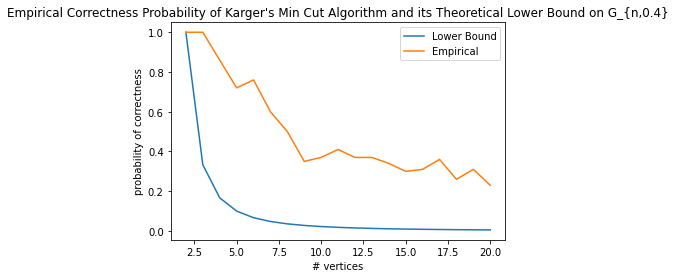

In [14]:
x = range(2, 21, 1)
plt.title(f"Empirical Correctness Probability of Karger's Min Cut Algorithm and its Theoretical Lower Bound on G_\u007bn,{0.4}\u007d")
plt.xlabel('# vertices')
plt.ylabel('probability of correctness')
plt.plot(x, bounds, label='Lower Bound')
plt.plot(x, actuals, label='Empirical')
plt.legend()
plt.show()

# Random Walks and Stationary Distributions
### Inspired by CS 174 Sp23 Final Q1a-c
- sol: https://people.eecs.berkeley.edu/~sinclair/cs174/final_sol.pdf

In [15]:
g = Graph('sp23-final')
for name in {'a', 'b', 'c', 'd', 'e', 'f'}:
    v = Vertex(name)
    g.add_vertex(v)
g.connect('a', 'b')
g.connect('a', 'c')
g.connect('b', 'c')
g.connect('b', 'd')
g.connect('c', 'd')
g.connect('d', 'e')
g.connect('d', 'f')
g.connect('e', 'f')

In [16]:
# Q1a
n = 1000000
walk = g.random_walk(n=n)
print(f'Proportion of time spent at vertex d in equilibrium – Expected: 0.25, Actual: {walk.count("d")/len(walk)}')

Proportion of time spent at vertex d in equilibrium – Expected: 0.25, Actual: 0.24975375024624977


In [17]:
# Q1b
n = 1000000 
g.move_to('d')
total = 0
for _ in range(n):
    total += len(g.random_walk_until(set('d')))
    
print(f'Time to return to d starting from d – Expected: 4, Actual: {total / n}')

Time to return to d starting from d – Expected: 4, Actual: 3.999543


In [18]:
# Q1c
n = 1000000
total = 0
for _ in range(n):
    g.move_to('e')
    total += len(g.random_walk_until('d'))
    
print(f'Time to hit to d starting from e – Expected: 2, Actual: {total / n}')

Time to hit to d starting from e – Expected: 2, Actual: 1.999862


# Independent Sets in Erdős–Rényi Random Graphs
### Inspired by CS 174 Sp23 Midterm Q4
- sol: https://people.eecs.berkeley.edu/~sinclair/cs174/sol_midterm.pdf

In [19]:
samples = 100
actuals = []
k = 4
p = 0.4

x = range(5, 51, 5)

for n in x:
    total = 0
    for _ in range(samples):
        g = Graph.gnp(n, p)
        total += len(g.independent_sets(k))
    actuals.append(total / samples)
expected = [Graph.choose(n, k) * ((1-p) ** (Graph.choose(k, 2))) for n in x]

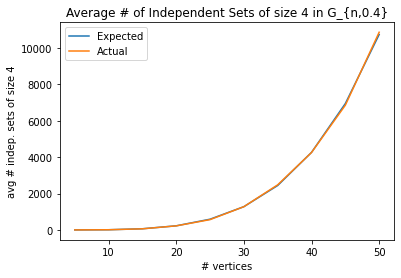

In [20]:
plt.title(f"Average # of Independent Sets of size {k} in G_\u007bn,{p}\u007d")
plt.xlabel('# vertices')
plt.ylabel(f'avg # indep. sets of size {k}')
plt.plot(x, expected, label='Expected')
plt.plot(x, actuals, label='Actual')
plt.legend()
plt.show()

# Unfair Games – Bankruptcy Probability and Stopping Time
### Inspired by CS 174 Sp23 Final Q11
- sol: https://people.eecs.berkeley.edu/~sinclair/cs174/final_sol.pdf

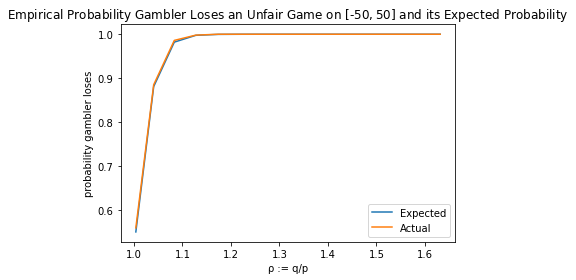

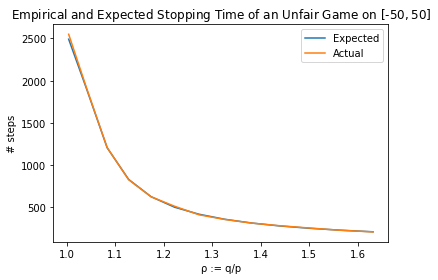

In [21]:
n = 100+1
g = Graph.gamblers_line(n)
# ps = [0.1, 0.2, 0.3, 0.35, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.499]
ps = [0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.499]
qs = [1 - p for p in ps]
m = n // 2
samples = 1000
expected_p_banks, actual_p_banks = [], []
expected_stopping_times, actual_stopping_times = [], []
ρs = []
for p, q in zip(ps, qs):
    ρ = q / p
    ρs.append(ρ)
    p_bank_expected = ((ρ ** m) - 1) / ((ρ ** m) - (ρ ** (-m)))
    p_bank_actual = 0
    actual_stopping_time = 0
    for _ in range(samples):
        g.move_to(str(m))
        walk = g.weighted_random_walk_until(p, q, {'0', str(n-1)})
        if walk[-1] == '0':
            p_bank_actual += 1
        actual_stopping_time += len(walk)
    p_bank_actual /= samples
    actual_stopping_time /= samples
    expected_p_banks.append(p_bank_expected)
    actual_p_banks.append(p_bank_actual)
    expected_stopping_times.append((m/(q-p)) * ((2*p_bank_expected) - 1))
    actual_stopping_times.append(actual_stopping_time)
plt.title(f"Empirical Probability Gambler Loses an Unfair Game on [-${m}, ${m}] and its Expected Probability")
plt.xlabel('ρ := q/p')
plt.ylabel(f'probability gambler loses')
plt.plot(ρs, expected_p_banks, label='Expected')
plt.plot(ρs, actual_p_banks, label='Actual')
plt.legend()
plt.show()
plt.title(f"Empirical and Expected Stopping Time of an Unfair Game on [-${m}, ${m}]")
plt.xlabel('ρ := q/p')
plt.ylabel(f'# steps')
plt.plot(ρs, expected_stopping_times, label='Expected')
plt.plot(ρs, actual_stopping_times, label='Actual')
plt.legend()
plt.show()

# DFS, BFS Sanity Check
- Example Graphs from DPV: https://people.eecs.berkeley.edu/~vazirani/algorithms/chap3.pdf, https://people.eecs.berkeley.edu/~vazirani/algorithms/chap4.pdf

In [22]:
g = Graph('DPV-fig4.4')
for name in {'S', 'A', 'C', 'D', 'E', 'B'}:
    v = Vertex(name)
    g.add_vertex(v)
g.connect('S', 'A')
g.connect('A', 'B')
g.connect('S', 'C')
g.connect('S', 'D')
g.connect('S', 'E')

assert g.bfs('S')[-1] == 'B', 'BFS should end with the vertex furthest from the source'

In [23]:
g = Graph('DPV-fig4.4-variation')
for name in {'S', 'A', 'C', 'D', 'E', 'B', 'F'}:
    v = Vertex(name)
    g.add_vertex(v)

g.connect('S', 'A')
g.connect('A', 'B')
g.connect('S', 'C')
g.connect('S', 'D')
g.connect('S', 'E')
g.connect('S', 'F')
g.connect('B', 'F')

bfs = g.bfs('S')
assert bfs.index('F') < bfs.index('B')

In [24]:
g = Graph('DPV-fig4.1')
for name in {'S', 'A', 'C', 'D', 'E', 'B'}:
    v = Vertex(name)
    g.add_vertex(v)
g.connect('S', 'A')
g.connect('A', 'B')
g.connect('B', 'C')
g.connect('S', 'C')
g.connect('S', 'D')
g.connect('S', 'E')
g.connect('D', 'E')

g.dfs('S')

['S', 'C', 'B', 'A', 'D', 'E']

In [25]:
g = Graph('DPV-fig3.2')
for name in {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'}:
    v = Vertex(name)
    g.add_vertex(v)
g.connect('D', 'G')
g.connect('D', 'H')
g.connect('D', 'A')
g.connect('A', 'C')
g.connect('A', 'B')
g.connect('B', 'F')
g.connect('C', 'F')
g.connect('B', 'E')
g.connect('E', 'I')
g.connect('E', 'J')
g.connect('I', 'J')

g.connect('K', 'L')


g.dfs('A')

['A', 'D', 'G', 'H', 'C', 'F', 'B', 'E', 'I', 'J']

# The Probabilistic Method
### Inspired by MU 6.2.1, 6.3, 6.4

### Las Vegas Approximate Max Cut

In [71]:
# test count method
g = Graph('DPV-fig4.4')
for name in {'S', 'A', 'C', 'D', 'E', 'B'}:
    v = Vertex(name)
    g.add_vertex(v)
g.connect('S', 'A')
g.connect('A', 'B')
g.connect('S', 'C')
g.connect('S', 'D')
g.connect('S', 'E')

g.count({'A', 'C', 'D', 'E', 'B'}, {'S'})

4

In [77]:
s0, s1 = g.random_partition()
print(s0, s1)
g.count(s0, s1)

{'B', 'S', 'C'} {'E', 'A', 'D'}


4

In [94]:
num_m_vals = 100
n = 100
p = 0.4
samples = 1000

iters = dict()

for _ in range(num_m_vals):
    g = Graph.gnp(n, p)
    while not g.is_connected() or g.num_edges() in iters:
        g = Graph.gnp(n, p)
    m = g.num_edges()
    iters[m] = [0, 0, (m/2) + 1]
    for _ in range(samples):
        s0, s1 = g.random_partition()
        cut_val = g.count(s0, s1)
        sample_iters = 1
        while cut_val < m/2:
            s0, s1 = g.random_partition()
            cut_val = g.count(s0, s1)
            sample_iters += 1
        iters[m][0] += sample_iters
        iters[m][1] += 1

In [80]:
# x = list(iters.keys())
# empirical_iters = [iters[m][0] / iters[m][1] for m in x]
# expected_iters = [iters[m][2] for m in x]

In [97]:
x = sorted(list(iters.keys()))
empirical_iters = [iters[m][0] / iters[m][1] for m in x]

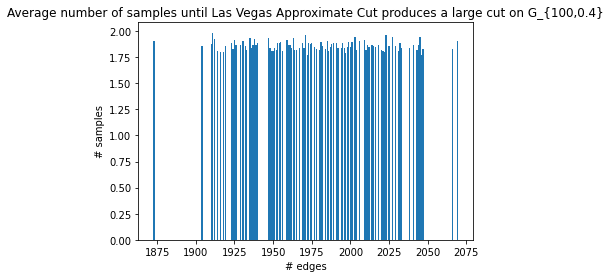

In [128]:
plt.title(f"Average number of samples until Las Vegas Approximate Cut produces a large cut on G_\u007b{n},{p}\u007d")
plt.xlabel('# edges')
plt.ylabel('# samples')
plt.bar(x, empirical_iters, label='Empirical')
# plt.plot(x, expected_iters, label='Expected')
# plt.legend()
plt.show()

### Derandomized Max Cut

In [127]:
n = 100
p = 0.4
samples = 1000

for _ in range(samples):
    g = Graph.gnp(n, p)
    while not g.is_connected():
        g = Graph.gnp(n, p)
    m = g.num_edges()
    A, B = g.greedy_max_cut()
    assert g.count(A, B) >= m/2, 'failed'
print('passed!')

passed!


### Monte Carlo Approximate Independent Set

In [142]:
n = 100
p = 0.4
samples = 100
n_graphs = 100

sizes = []
expected_sizes = []
m_values = []

for _ in range(n_graphs):
    g = Graph.gnp(n, p)
    avg_set_size = 0
    while not g.is_connected():
        g = Graph.gnp(n, p)
    m = g.num_edges()
    m_values.append(m)
    d = g.avg_degree()
    expected = n/(2*d)
    for _ in range(samples):
        s = g.random_independent_set()
        avg_set_size += len(s)
    sizes.append(avg_set_size / samples)
    expected_sizes.append(expected)

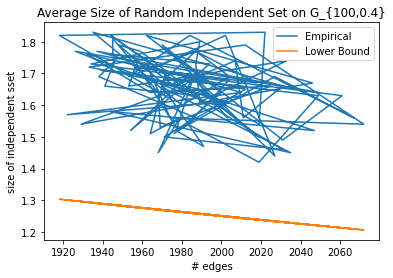

In [146]:
plt.title(f"Average Size of Random Independent Set on G_\u007b{n},{p}\u007d")
plt.xlabel('# edges')
plt.ylabel('size of independent sset')
plt.plot(m_values, sizes, label='Empirical')
plt.plot(m_values, expected_sizes, label='Lower Bound')
plt.legend()
plt.show()

# The First Approximation Algorithm for `Minimum Balanced Cut`
### Implementation of https://arxiv.org/pdf/0809.3232.pdf by Spielman and Teng

In [1]:
import numpy as np
class STGraph:
    """
    vertices are `int`s
    """
    
    def __init__(self, n, name='graph'):
        self.name = name
        self.n = n
        self.V = set(range(n))
        self.A = np.array([n * [0] for _ in range(n)])
        
    def add_edge(self, u, v):
        assert u < len(self.A) and v < len(self.A), f'At least one of either vertex {u} or {v} does not exist in {self.name}'
        assert not (u != v and self.A[u][v] == 1), f'No multi-edges between distinct vertices in {self.name}'
        self.A[u][v] += 1
        if u != v:
            self.A[v][u] = 1
    
    def del_edge(self, u, v):
        assert u < len(self.A) and v < len(self.A), f'At least one of either vertex {u} or {v} does not exist in {self.name}'
        assert self.A[u][v] == 1, f'Edge ({u}, {v}) does not exist in {self.name}'
        self.A[u][v] -= 1
        if u != v:
            self.A[v][u] = 0
            
    def degree(self, u):
        return np.sum(self.A[u]) # + self.A[u][u]
            
    def conductance(self, s=None, induced=None):
        if induced is None:
            induced = self.V
        elif len(induced) == 1 and s is None:
            return 1
        if s is not None:
            if self.mu(s) == 0:
                print(s)
            return self.cut_edges(s, induced) / min(self.mu(s), self.mu(induced - s))
        elif s == set():
            return 1
        else:
            conductances = []
            for b in range(1, 2 ** (self.n - 1)):
                s = set()
                for u in range(self.n):
                    if (b >> u) & 1 == 1:
                        s.add(u)
                conductances.append(self.conductance(s, induced=induced))
            return min(conductances)
            
    def cut_edges(self, s, induced=None):
        if not induced:
            induced = self.V
        return np.sum((self.A - (np.diag(np.diagonal(self.A))))[sorted(list(s))][:, sorted(list(induced - s))])
        """
        count = 0
        for u in s:
            for v in range(self.n):
                if self.A[u][v] == 1 and v not in s:
                    count += 1
        return count
        """
    
    def mu(self, s):
        return sum([self.degree(u) for u in s])
    
    def balance(self, s):
        return min(self.mu(s), self.mu(self.V - s)) / self.mu(self.V)
    
    def verify_sparsest(self, s):
        return self.conductance(s) == self.conductance() and self.mu(s) / self.mu(self.V) <= 1/2
    
    def subgraph(self, s):
        c = STGraph.copy(self)
        subset_indices = sorted(list(s))
        c.A = c.A[subset_indices][:, subset_indices]
        c.n = len(subset_indices)
        c.V = set(range(c.n))
        return c
        
    @classmethod
    def copy(cls, G):
        copy = cls(G.n, f'copy of {G.name}')
        copy.A = np.copy(G.A)
        copy.V = set(G.V)
        return copy
    
    def restored_subgraph(self, s):
        subgraph = self.subgraph(s)
        original_vertices = sorted(list(s))
        for v in range(subgraph.n):
            subgraph.A[v][v] += self.degree(original_vertices[v]) - subgraph.degree(v)
        return subgraph
    
    def del_vertex(self, v):
        self.A = np.vstack((self.A[0:v], self.A[v+1:]))
        self.A = np.hstack((self.A[:, 0:v], self.A[:, v+1:]))
        self.n -= 1
        self.V = set(range(self.n))
        
    def x(self, s):
        return np.array([1 if u in s else 0 for u in sorted(list(self.V))])
    
    def psi(self, s):
        return np.array([self.degree(u) / self.mu(s) if u in s else 0 for u in sorted(list(self.V))])
    
    def M(self):
        return np.matmul(self.A, np.linalg.inv())
        
    def __repr__(self):
        return str(self.A)

In [2]:
g = STGraph(7) # src: https://en.wikipedia.org/wiki/Degree_(graph_theory)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(4, 4)
g.add_edge(4, 5)
g.add_edge(4, 6)
g.add_edge(5, 6)
g.add_edge(2, 5)
g2 = STGraph.copy(g)
g.A = g.A[1:, 1:]
g.n -= 1
g.V = set(range(g.n))
g2.del_vertex(0)
print(g.A)
print(g2.A)
# g.mu(g.V)
assert g.conductance({0,2,4}) == g.conductance({1,3,5})
assert g.conductance() <= g.conductance({1,3,5})

[[0 1 0 0 0 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 1 1 1]
 [0 1 0 1 0 1]
 [0 0 0 1 1 0]]
[[0 1 0 0 0 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 1 1 1]
 [0 1 0 1 0 1]
 [0 0 0 1 1 0]]


In [3]:
g.subgraph({0,1,2}), g.restored_subgraph({0,1,2}), g

([[0 1 0]
  [1 0 1]
  [0 1 0]],
 [[0 1 0]
  [1 1 1]
  [0 1 1]],
 [[0 1 0 0 0 0]
  [1 0 1 0 1 0]
  [0 1 0 1 0 0]
  [0 0 1 1 1 1]
  [0 1 0 1 0 1]
  [0 0 0 1 1 0]])